#### Модель логистической регрессии

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split

Создадим датасет для применения метода логистической регрессии с 2 признаками

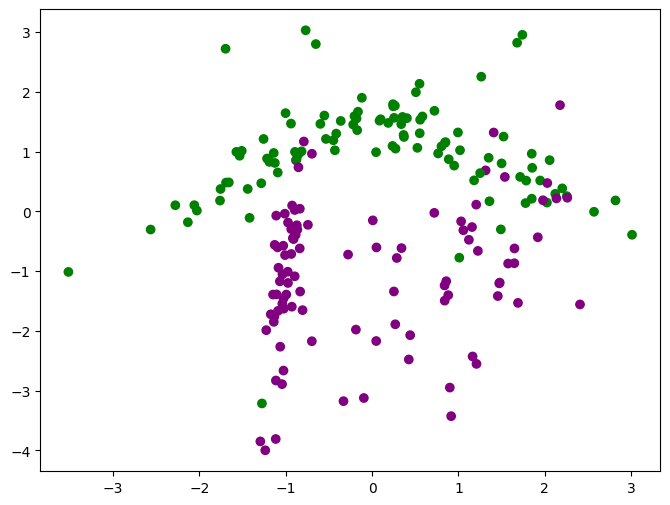

In [2]:
classes = datasets.make_classification(n_samples = 200, n_features = 2, n_informative = 2, n_redundant = 0, random_state = 1)
colors = ListedColormap(['purple', 'green'])

plt.figure(figsize = (8, 6))
plt.scatter([x[0] for x in classes[0]], [x[1] for x in classes[0]], c = classes[1], cmap = colors)
plt.show()

Перемешаем данные перед разделением на выборки

In [3]:
np.random.seed(12)
shuffle_index = np.random.permutation(classes[0].shape[0])
X_shuffled, y_shuffled = classes[0][shuffle_index], classes[1][shuffle_index]

X_train, X_test, y_train, y_test = train_test_split(X_shuffled, y_shuffled, test_size = 1 / 3, random_state = 0)

print("Размер массива признаков обучающей выборки", X_train.shape)
print("Размер массива признаков тестовой выборки", X_test.shape)
print("Размер массива ответов для обучающей выборки", y_train.shape)
print("Размер массива ответов для тестовой выборки", y_test.shape)

Размер массива признаков обучающей выборки (133, 2)
Размер массива признаков тестовой выборки (67, 2)
Размер массива ответов для обучающей выборки (133,)
Размер массива ответов для тестовой выборки (67,)


In [11]:
class LogisticRegression:
    def __init__(self, learning_rate = 0.1, tolerance = 0.0001, epochs = 1000):
        self.learning_rate = learning_rate
        self.tolerance = tolerance
        self.epochs = epochs
        self.weights = None
        self.losses = []

    def log_loss(self, w, X, y):
        n_samples = X.shape[0]
        y_pred = X @ w
        y_pred_sigm = 1 / (1 + np.exp(-y_pred))

        # функция потерь
        loss = -np.mean(y * np.log(y_pred_sigm + 1e-8) + (1 - y) * np.log(1 - y_pred_sigm + 1e-8))
        grad = (1 / n_samples) * X.T @ (y_pred_sigm - y.reshape(-1, 1))
        return loss, grad

    def optimize(self, w, X, y, n_iterations, eta):
        losses = []
        for i in range(n_iterations):
            loss, grad = self.log_loss(w, X, y)
            w -= eta * grad
            losses.append(loss)
        return w, losses
        
    def predict_proba(self, X):
        '''Предсказание вероятности'''
        X_with_bias = np.c_[np.ones(X.shape[0]), X]
        y_pred = X_with_bias @ self.weights
        return 1 / (1 + np.exp(-y_pred))

    def predict(self, X, b = 0.5):
        '''Предсказание классов'''
        probabilities = self.predict_proba(X)
        return (probabilities >= b).astype(int).flatten()
         
    def fit(self, X, y):
        X_with_bias = np.c_[np.ones(X.shape[0]), X]
        
        y = y.reshape(-1, 1) if len(y.shape) == 1 else y
        
        n_features = X_with_bias.shape[1]
        w0 = np.zeros((n_features, 1))

        self.weights, self.losses = self.optimize(w0, X_with_bias, y, self.epochs, self.learning_rate)
        return self

    def accuracy(self, X, y):
        y_pred = self.predict(X)
        accuracy = 100.0 - np.mean(np.abs(y_pred - y)) * 100.0
        return accuracy

In [12]:
model = LogisticRegression(learning_rate = 0.1, epochs = 1000)
model.fit(X_train, y_train)

y_predicted_test = model.predict(X_test)
y_predicted_train = model.predict(X_train)

test_accuracy = model.accuracy(X_test, y_test)
train_accuracy = model.accuracy(X_train, y_train)

print(f"Точность на обучающей выборке: {train_accuracy:.3f}")
print(f"Точность на тестовой выборке: {test_accuracy:.3f}")

Точность на обучающей выборке: 88.722
Точность на тестовой выборке: 82.090


#### Функция потерь log loss

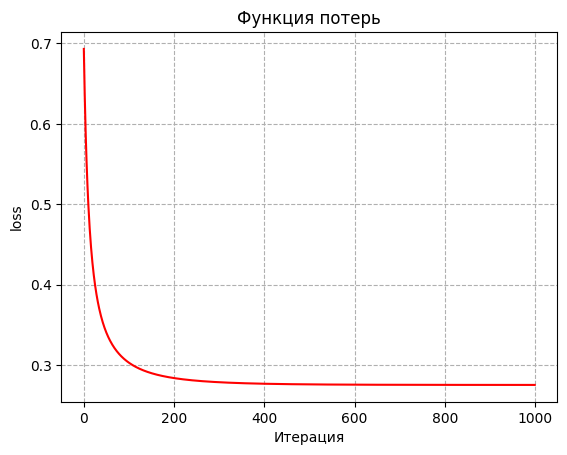

In [8]:
plt.plot(model.losses, color = 'red')
plt.title('Функция потерь')
plt.xlabel('Итерация')
plt.ylabel('loss')
plt.grid(True, ls = '--')
plt.show()

In [9]:
w0 = model.weights[0, 0]
w1 = model.weights[1, 0]
w2 = model.weights[2, 0]
 
print(f"bias = {w0:.3f}, w1 = {w1:.3f}, w2 = {w2:.3f}")

bias = -0.166, w1 = -0.142, w2 = 2.653


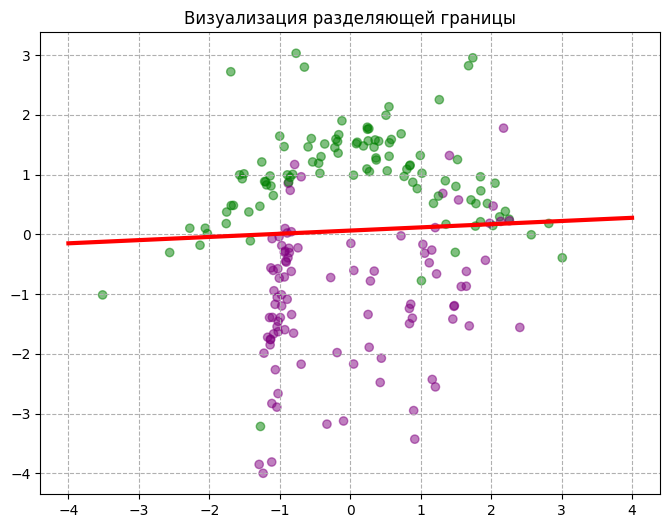

In [10]:
data = np.linspace(-4, 4, 200)
plt.figure(figsize=(8, 6))
plt.scatter([x[0] for x in classes[0]], [x[1] for x in classes[0]], c=classes[1], cmap=colors, alpha = 0.5)
plt.plot(data, -(w0 + w1 * data) / w2, color = 'red', linewidth = 3)
plt.title('Визуализация разделяющей границы')
plt.grid(True, ls = '--')
plt.show()